# Tutorial Overview
1. __讀取檔案__.
    - 1.1__資料探索__
    - 1.2__資料處理__
2. __定義模型__.
3. __編譯模型__.
4. __擬合模型__.
5. __評估模型__.
6. __Summary__



## 數據集 [這裡下載](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes):

- 資料屬性:


1. Number of times pregnant.  
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)


- 數據格式

6, 148, 72, 35, 0, 33.6, 0.627, 50, 1

1, 85, 66, 29, 0, 26.6, 0.351, 31, 0

8, 183, 64, 0, 0, 23.3, 0.672, 32, 1

1, 89, 66, 23, 94, 28.1, 0.167, 21, 0

### 1.讀取檔案.

In [34]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
np.random.seed(87)

# 避免讀取檔案格式難看可以使用

# 1. url當作 path
url = "dataset/pima-indians-diabetes.data.txt"
# 2. import sys
##   sys.path.append("dataset/pima-indians-diabetes.data.txt")
##   這樣就不必只用url，只需要輸入檔名，就可直接讀取dataset資料夾下面的

# numpy讀檔函式 laodtxt，也可以使用pandas
dataset = np.loadtxt(url, delimiter=",")
df = pd.read_csv(url, header= None, names = ['懷孕次數', '血漿葡萄濃度', 
                                             '舒張壓', '皮膚厚度', '胰島素濃度', 
                                             'BMI','糖尿病的ＸＸ函數', '年紀', '糖尿病患與否'] )
### 此行是因為中文字進行編碼轉換
#df.columns = df.columns.str.encode('utf-8')

# 分割檔案為，輸入/標籤，自己選用哪個方式
dfX = df.iloc[:,:-1] 
dfY = df.iloc[:,-1]

X = dataset[:,0:8]
Y = dataset[:,8]

- 1.1 資料探索

處理數據時候，必須有幾本好習慣，查看數據統計性質，此筆資料具有768個樣本，具備8個特徵值(Feature)

In [19]:
df.head() # head為，前五比樣本，tail後五筆樣本

,懷孕次數,血漿葡萄濃度,舒張壓,皮膚厚度,胰島素濃度,BMI,糖尿病的ＸＸ函數,年紀,糖尿病患與否
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#此為測試區！自行測試數據
dataset.shape, df.shape  # 兩種讀取方式，都一樣 :-)

((768, 9), (768, 9))

- 查看資料型態，是否存在object Type

In [23]:
df.dtypes

懷孕次數          int64
血漿葡萄濃度        int64
舒張壓           int64
皮膚厚度          int64
胰島素濃度         int64
BMI         float64
糖尿病的ＸＸ函數    float64
年紀            int64
糖尿病患與否        int64
dtype: object

- 查看數據，是否存在骯髒資料， NaN，資料庫來自卡內基？大學，資料都是乾淨的，但是請保持良好習慣

In [24]:
df.isnull().sum()  # 'NaN並不存在

懷孕次數        0
血漿葡萄濃度      0
舒張壓         0
皮膚厚度        0
胰島素濃度       0
BMI         0
糖尿病的ＸＸ函數    0
年紀          0
糖尿病患與否      0
dtype: int64

- 查看統計數據

In [25]:
df.describe()

,懷孕次數,血漿葡萄濃度,舒張壓,皮膚厚度,胰島素濃度,BMI,糖尿病的ＸＸ函數,年紀,糖尿病患與否
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


對於變量，研究數據方式，必須循序漸進 
1. Uni Variable analysis
2. Two Variables analysis
3. Multi Variables analysis

- Uni vairable 檢視數據分佈圖，通常是以下

    1. Gaussian Distribution (bell shpae)
    2. Gaussian Distribution with Righ/Left skewed
    3. Poisson Distribution // Mixture Gaussians


- 嘗試以下的code，採用log對數後，數據分佈圖會如何？
- Q: 為什麼要取對數？
- Q: 為什麼要看數據分佈圖？

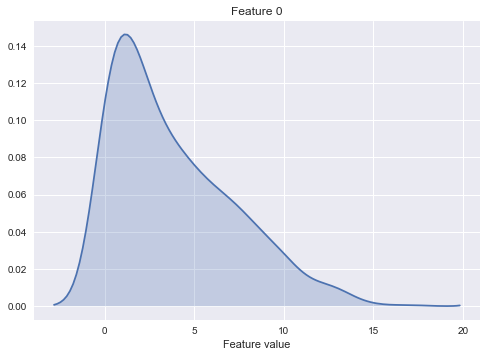

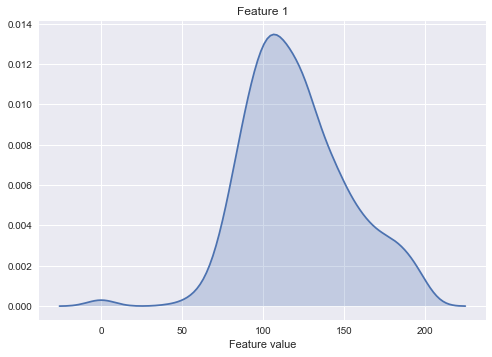

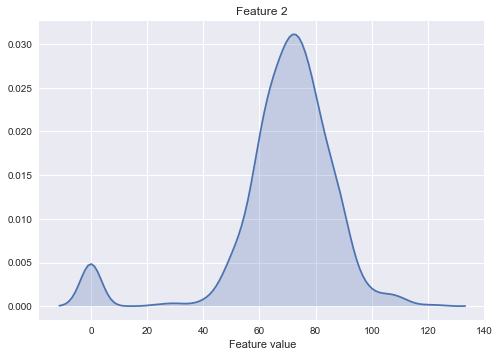

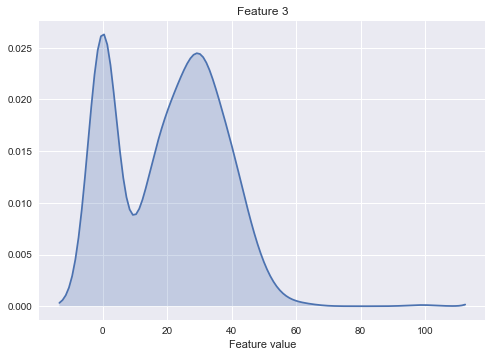

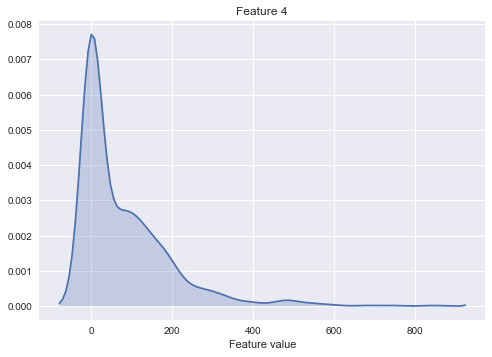

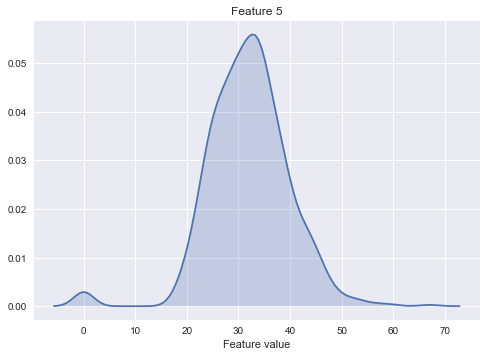

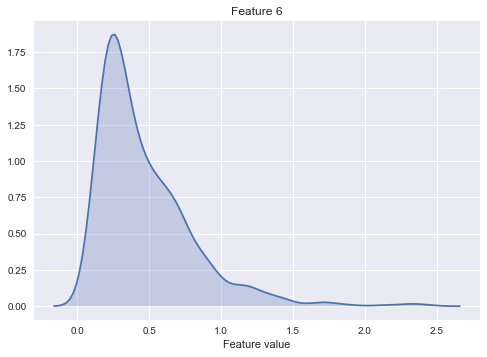

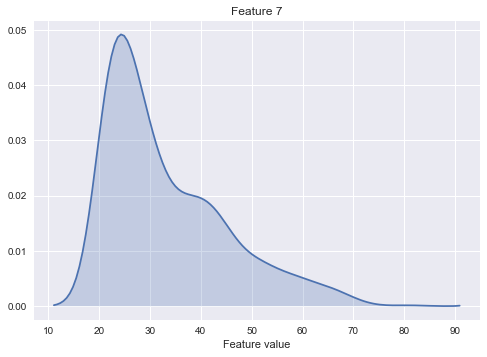

In [38]:
for c in range(0,8):
    sns.kdeplot(X[:,c], shade=True)
    plt.title('Feature %d'%(c))
    plt.xlabel('Feature value')
    plt.show()


### 2.定義模型.

- Keras疊積木時間。


1. 宣告序列輸入
2. 輸入8個，進入10個神經元隱藏層
3. 10個再進入16個隱藏層
4. 輸出1個位元

    - keras神經網路權重weights初始化預設是，均勻分布0 ~ 0.05。
    

- Q : input_dim = 8 為什麼輸入神經元要設定成為8 ?
- Q : 為什麼Activation 要用relu，但是最後卻是sigmoid？

- A : 因為每次輸入數據有八個不同數值，sigmoid問題有微分爆炸/消失有關， 請 google **gradient vanish**

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu')) 
model.add(Dense(16, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

### 3.編譯模型.

1. 我們使用的損失函數是：二位元交互訊息[註1]。
2. 優化方式： Adam[註2]。  這兩種optimizers/優化算法，的結合 Adagrad + Momentum
3. Metric/度量子[註3]。

[註1] 盡可能最小化Mutaul information，相關訊息請拜讀 Information Theory前幾個chapters。

[註2] Adam: A Method for Stochastic [Optimization]( http://arxiv.org/abs/1412.6980)

[註3] [Evaluating Machine Learning Methods](http://pages.cs.wisc.edu/~dpage/cs760/evaluating.pdf)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4.擬合模型.

- Hint :從768筆資料抽出幾筆(batch size)去做訓練，重複一次叫做一個epoch。

- 參數可自行調整

In [8]:
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s - loss: 2.7916 - acc: 0.6693     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.8642 - acc: 0.6263     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.6582 - acc: 0.6549     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.6362 - acc: 0.6719     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6332 - acc: 0.6471     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6213 - acc: 0.6862     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6170 - acc: 0.6810     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6111 - acc: 0.6810     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6086 - acc: 0.6888     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6045 - acc: 0.6823     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6027 - acc

### 5.評估模型

如何得知，訓練好的模型透用在新的數據上表現如何。
簡
單的做法就是，我們把數據拆解成，訓練/測試兩個數據，我們在這先把訓練好的模型，套用原先的數據，看看表現如何。

- Q: 可以把原先拿去訓練的數據再套用上去嗎？

In [12]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0s
acc: 77.34%


### 6. Summary

1. 讀取檔案 numpy.loadtxt
2. 定義模型 model = Sequential(), model.add()...
    
3. 編譯模型，損失函數，優化方式，度量方式
4. 擬合 fit(X, Y, epochs=150, batch_size=10)
5. 評估模型evaluate(X, Y)